<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Boosting Classifiers
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción

Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una compañia de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El vector objetivo a modelar es la tasa de rotación entre los clientes de una compañia de telecomunicaciones churn . Los atributos existentes hacen referencia a características de la cuenta de cada cliente.


Lista de atributos:
* `State`: Estado de Estados Unidos
* `Account Length`: Tiempo en que la cuenta ha sido activada
* `Area Code`: código de área.
* `international plan`: Plan internacional activiado
* `voice mail plan`: Plan de mensajes de voz activado
* `number_vmail_messages`: Cantidad de mensajes de voz.
* `total_day_minutes`: Cantidad de minutos ocupados en la mañana. 
* `total_day_calls`: Cantidad de llamadas realizadas en la mañana. 
* `total_day_charge`: Cobros realizados en la mañana.
* `total_eve_minutes`: Cantidad de minutos ocupados en la tarde.
* `total_eve_calls`: Cantidad de llamadas realizadas en la tarde. 
* `total_eve_charge`: Cobros realizados en la tarde.
* `total_night_calls`: Cantidad de llamadas realizadas en la noche. 
* `tota_night_minutes`: Cantidad de minutos ocupados en la noche.
* `total_night_charge`: Cobros realizados en la noche.
* `total_intl_minutes`: Cantidad de minutos ocupados en llamadas internacionales. 
* `total_intl_calls`: Cantidad de llamadas internacionales realizadas. 
* `total_intl_charge`: Cobros realizados por llamadas internacionales.
* `churn`: 1 si el cliente se cambió de compañia, 0 de los contrario.

Los datos provienen del paquete `AppliedPreditiveModeling` de `R`.

## Ejercicio 1: Preprocesamiento

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings

> Definimos algunos aspectos de ambiente y valores por defecto de visualización.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (14, 8)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utilizan librerías <strong>sklearn</strong> para el modelo, el tratamiento de escala de valores de los atributos y seleccion de set de datos:

In [4]:
# Método para la selección de datos entre entrenamiento, test y CV
from sklearn.model_selection import train_test_split, GridSearchCV
# Método para reportar las métricas de modelos de clasificación
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
# Método para generar un modelo de regresión con arboles de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

> Cargamos la base de datos

In [5]:
# Se carga la base de datos y se elimina la columna 'Unnamed: 0' que no aporta valor al análisis.
df = pd.read_csv('churn_train.csv').drop(columns='Unnamed: 0')

In [6]:
# Inspeccionamos los datos
df.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
38,AK,136,area_code_415,yes,yes,33,203.9,106,34.66,187.6,99,15.95,101.7,107,4.58,10.5,6,2.84,3,no
1566,WV,80,area_code_415,no,yes,38,236.6,69,40.22,197.5,68,16.79,209.5,102,9.43,9.5,10,2.57,2,no
2807,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2,no
1069,NV,22,area_code_510,no,no,0,160.4,108,27.27,218.1,88,18.54,192.9,115,8.68,12.5,4,3.38,1,no
1984,TN,112,area_code_415,no,no,0,272.5,119,46.33,226.1,94,19.22,159.1,94,7.16,16.4,5,4.43,3,yes


* Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.


> Revisamos tipos de datos para determinar el tratamiento de los datos y visualizamos los datos perdidos:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

> Si bien con el método info() podemos ver que todas las columnas son non-null, es decir que no presentan datos perdidos, para efectos visuales se revisan los datos perdidos con la el método matrix() de msngo.

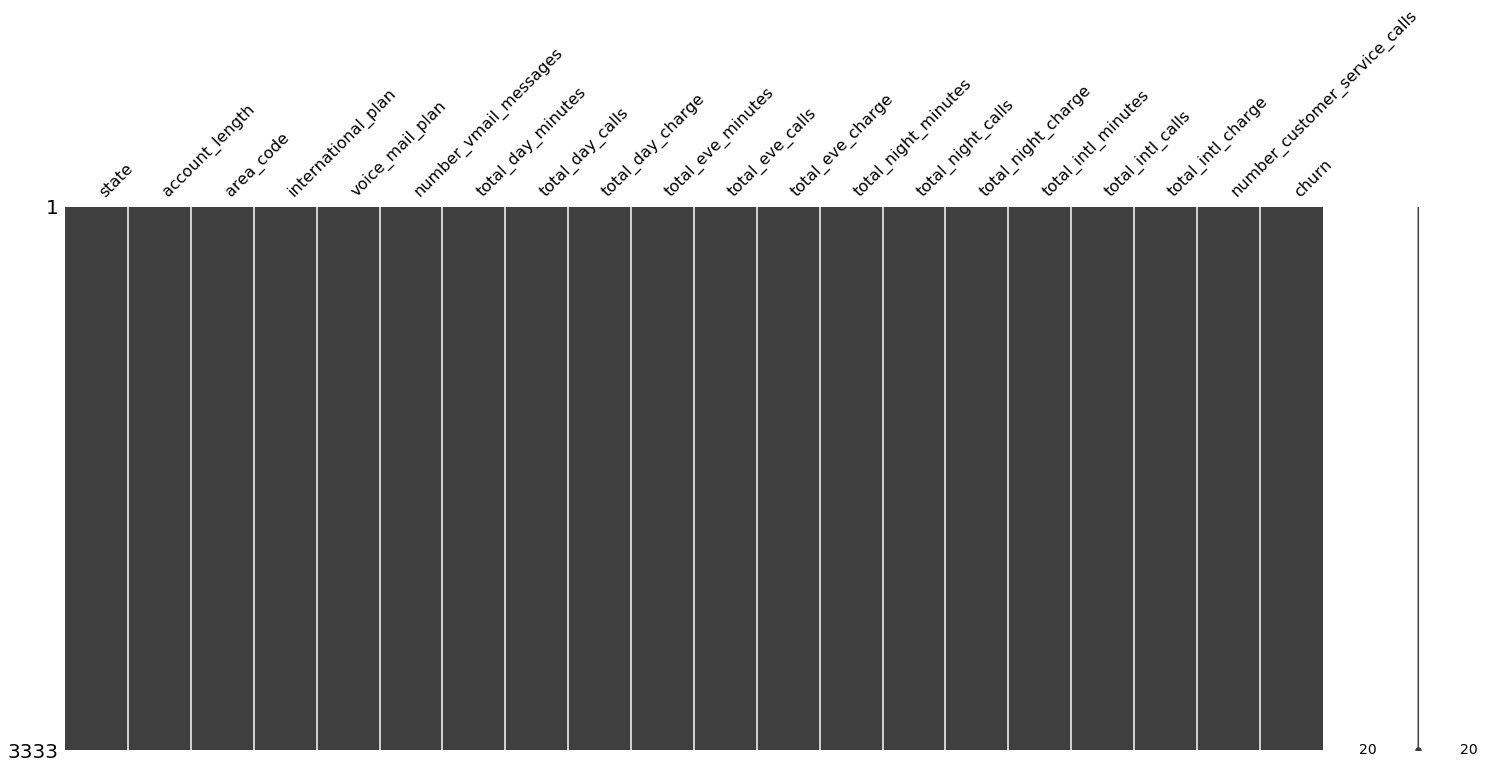

In [8]:
msngo.matrix(df)

> No se observan datos perdidos en la base de datos, podemos seguir con el análisis.

In [9]:
# Revisamos las dimensiones de la base de datos
df.shape

(3333, 20)

> Revisamos nuestro vector objetivo __churn__ (1 si el cliente se cambió de compañia, 0 de los contrario)

In [10]:
np.round(df['churn'].value_counts('%'), 2)

no     0.86
yes    0.14
Name: churn, dtype: float64

> La base de datos se compone de 3333 observaciones con 19 atributos y el vector de clases [churn]. Podemos observar que hay un desbalanceo de clases en la muestra ya que vemos que hay un 86% de datos etiquetados con la __clase no__ (cliente no se cambia de compañía) y un 14% con la __clase yes__ (cliente se cambia de compañía).

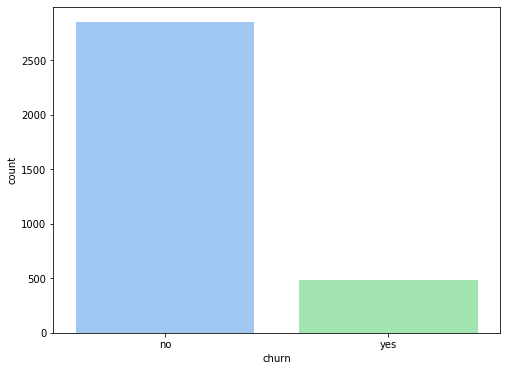

In [11]:
# Revisamos gráficamente el desbalance de clases de nuestro vector objetivo
plt.figure(figsize=(8,6))
sns.countplot(x='churn', data=df)

> Ahora revisamos los atributos o variables independientes.

Para no deteriorar la calidad de la visualización, separamos el atributo state ya que el gráfico de ocurrencias presenta muchos valores y no queremos que se vea un gráfico saturado.

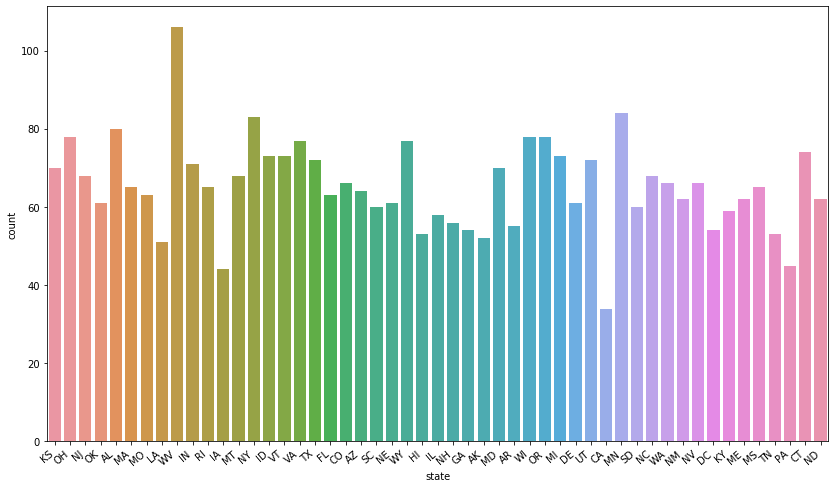

In [12]:
sns.countplot(df['state'])
plt.xticks(rotation=40, ha="right");

In [13]:
np.round(df['state'].value_counts().mean(), 2)

65.35

> El atributo __state__ no tiene mucha variación en la distribución y las muestras por Estado están en torno a 65. Es decir que se tomaron en promedio 65 muestras por estado.

In [14]:
df['state'].value_counts().mean()

65.3529411764706

___
> Ahora revisamos el resto de atributos

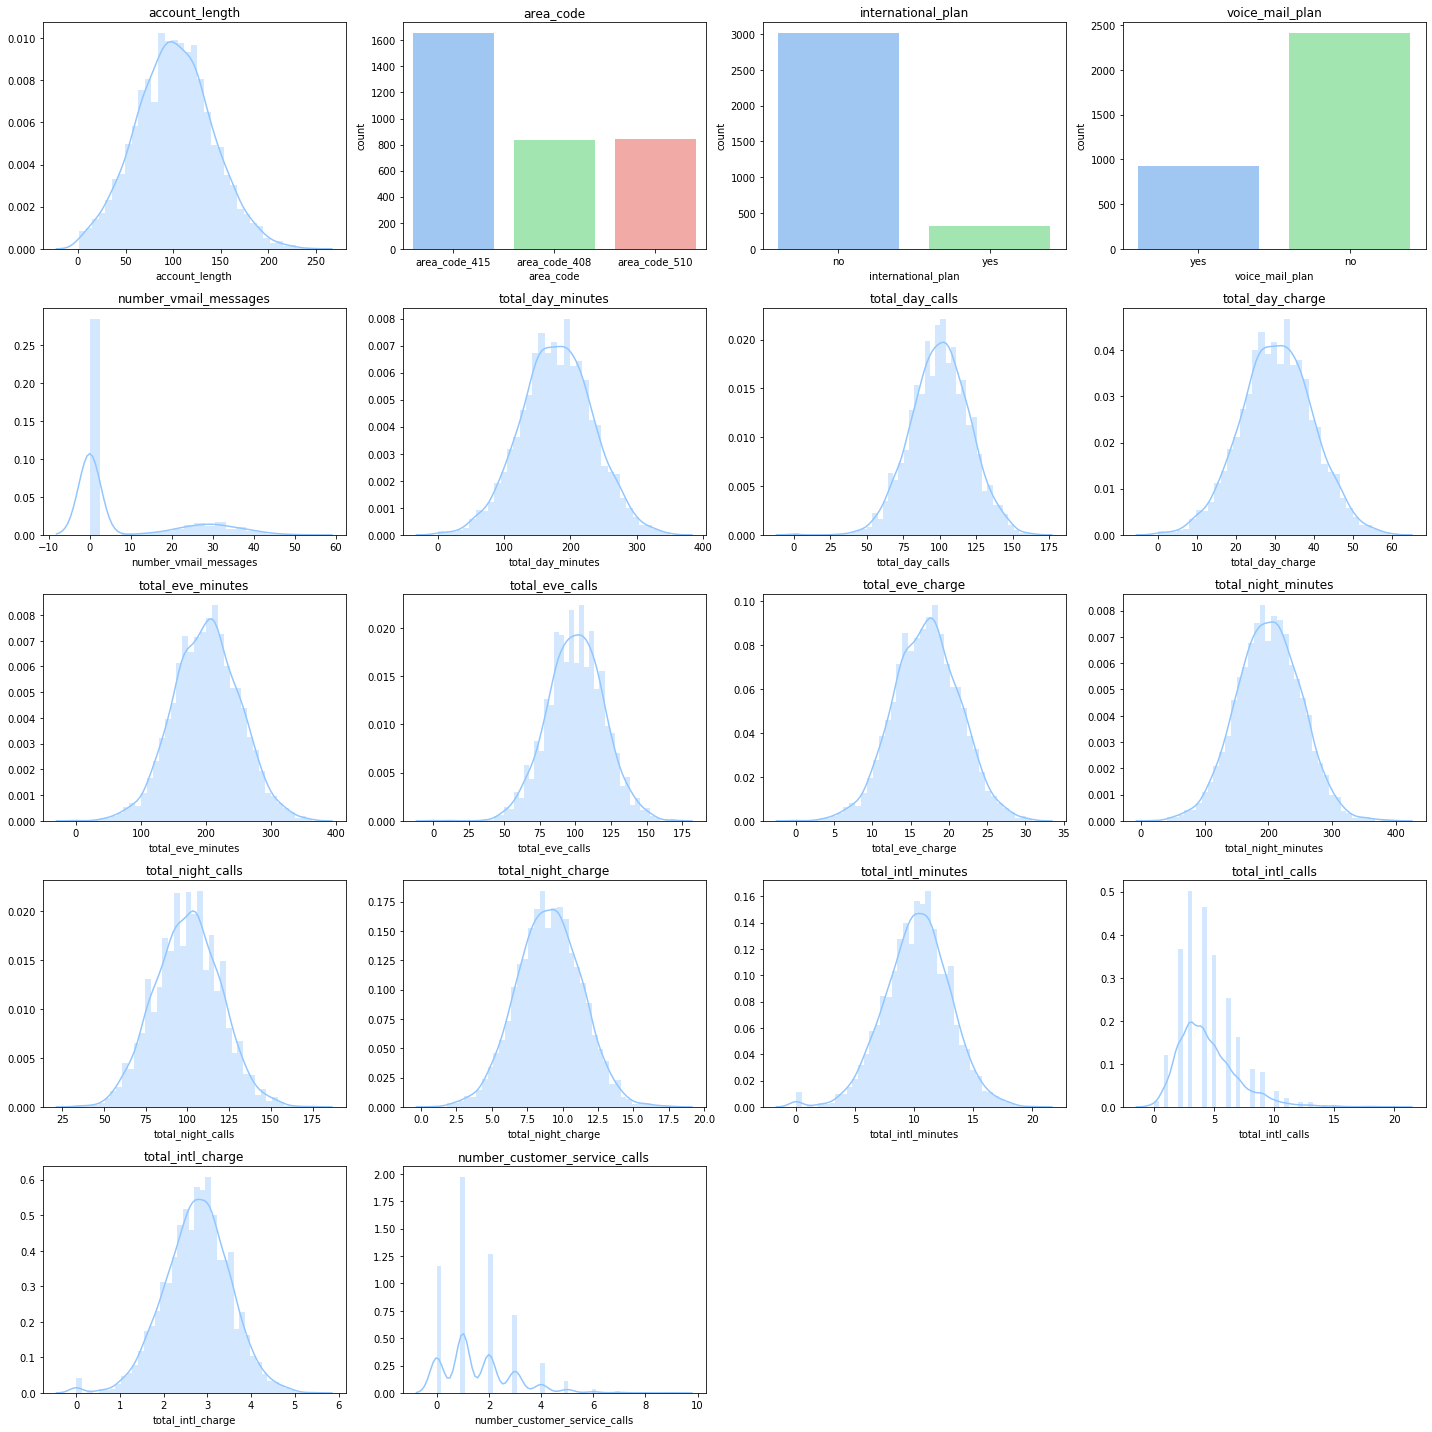

In [15]:
# Generamos una grilla con los gráficos de distribución del resto de atributos.
plt.figure(figsize=(20,20))
row = 5
col = df.shape[1]//row
# Recorremos el listado de atributos except churn y state que ya fueron analizados.
for index, (colname, serie) in enumerate(df.drop(columns=['churn', 'state']).iteritems()):
    plt.subplot(row, col, index+1)
    # Si el atributo es categórico se usa un grafico de ocurrencias
    if serie.dtype == 'object':
        sns.countplot(serie)
    # Sino, se utiliza un grafico de distribución
    else:
        sns.distplot(serie)
    plt.title(colname)
    plt.tight_layout()

> Las variables categóricas (area_code, international_plan y voice_mail_plan) presentan un desbalance considerable de ocurrencias, pero usaremos resampling para no alejarnos del objetivo del ejercicio. Estas variables, junto a state, serán recodificadas en valores binarios para lograr una mejor representación en el modelo predictivo.
>
> Respecto a las variables continuas, se observa normalidad en la distribución excepto en los atributos number_vmail_messages, total_intl_calls y number_customer_service_calls que presentan sesgos en valores puntuales. En estos atributos aplicaremos una transformación con el logaritmo de los valores.

___
> Entendiendo la operación de las compañias de teléfono podemos observar que hay una correlación entre la cantidad de minutos y el cobro, por lo que vamos a revisar que tan correlacionados están estos dos atributos:


In [16]:
max_corr = df.corr().filter(regex='_charge').transpose().filter(regex='_minutes')
max_corr

,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
total_day_charge,1.000000,0.007050,0.004324,-0.010157
total_eve_charge,0.007029,1.000000,-0.012592,-0.011043
total_night_charge,0.004300,-0.012593,0.999999,-0.015214
total_intl_charge,-0.010092,-0.011067,-0.015180,0.999993


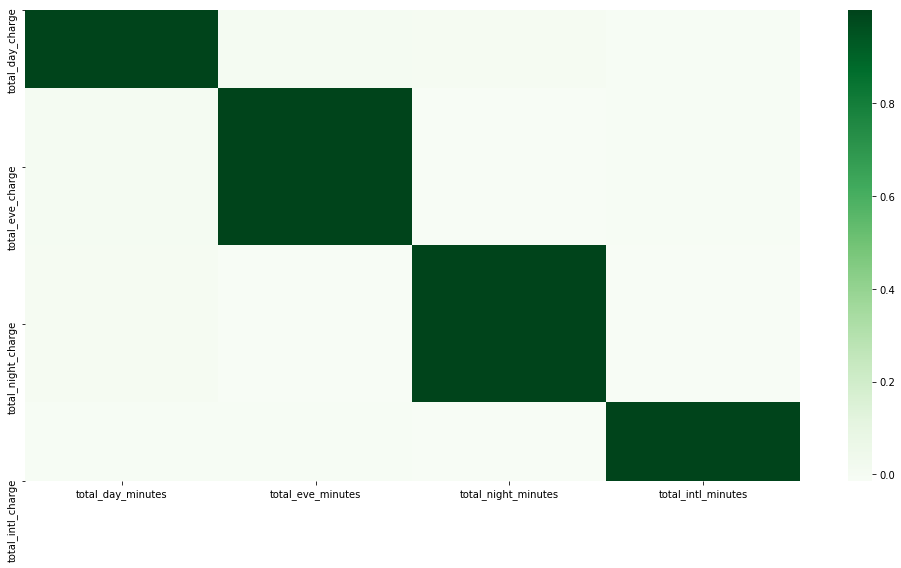

In [17]:
sns.heatmap(max_corr, cmap='Greens')
plt.tight_layout()

> Efectivamente hay una correlación muy fuerte (completamente correlacionadas) entre los minutos ocupados y los cobros en los distintos segmentos (day, eve, night, international).
>
> Podríamos estar tentados en sacar uno de los 2 atributos por segmento para evitar el problema de la multicolinealidad de atributos. No obstante vamos a dejar los atributos inicialmente y presentaremos un modelo posterior al ejercicio y evaluaremos el efecto.

* En  base al  comportamiento de  los  atributos,  considere si  es  necesario implementar  algunarecodificación o transformación de atributo. Algunas normas a seguir:
  * Para las variables categóricas, recodifíquelas en variables binarias.
  * Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con sulogaritmo.

___
> Aplicaremos las transformaciones a las variables continuas number_vmail_messages, total_intl_calls y number_customer_service_calls:

In [18]:
var_cont_log = ['number_vmail_messages', 'total_intl_calls', 'number_customer_service_calls']

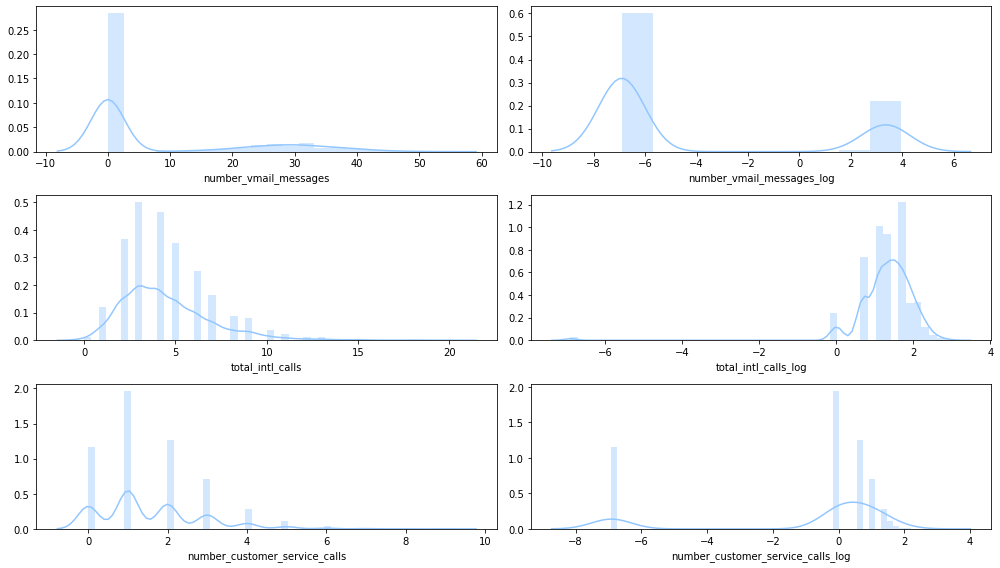

In [19]:
# Aplicamos logaritmo a las variables que presentan sesgo en ciertos valores y graficamos el antes 
# y el después de aplicar la transformación

df_log = df.copy()

for i, var in enumerate(var_cont_log):
    plt.subplot(3,2, i + i + 1)
    sns.distplot(df_log[var])
    df_log[var + '_log'] = np.log(df_log[var] + 0.001)
    plt.subplot(3,2, i + i + 2)
    sns.distplot(df_log[var + '_log'])
    plt.tight_layout()

In [20]:
# Eliminamos las columnas originales
df_log.drop(columns=var_cont_log, inplace=True)

> Podemos observar que la distribución se mueve un poco, permitiendo anular un poco el sesgo.

___
> Ahora procesamos las variables categóricas:

In [21]:
# Usamos procesamiento vectorial para transformar el DF
df_proc = pd.get_dummies(df_log, 
               [x for x in df_log.columns if df_log[x].dtype =='object'], 
               dummy_na=False,
               drop_first=True
              )

In [22]:
# Revisamis la estructura de nuestra nueva base de datos
df_proc.shape

(3333, 70)

In [23]:
# Revisamos aleatoreamente los datos
df_proc.sample(5, random_state=14173)

,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_charge,number_vmail_messages_log,total_intl_calls_log,number_customer_service_calls_log,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
349,100,107.0,63,18.19,105.7,67,8.98,243.1,74,10.94,12.8,3.46,-6.907755,1.098946,1.386544,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1111,55,189.0,100,32.13,118.5,99,10.07,248.1,87,11.16,17.1,4.62,-6.907755,1.791926,-6.907755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2861,75,210.3,90,35.75,241.8,87,20.55,215.7,102,9.71,13.1,3.54,2.944492,1.098946,1.386544,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
747,155,184.6,102,31.38,196.0,117,16.66,226.5,122,10.19,7.8,2.11,-6.907755,0.001000,0.001000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3086,54,236.3,91,40.17,152.8,130,12.99,160.3,98,7.21,11.2,3.02,-6.907755,2.079567,1.098946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


## Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

* Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla con las siguientes especificaciones:


|__Modelo__   | __Grilla__  |
|---|---| 
| AdaBoostClassifier| {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}|
| GradientBoostingClassifier |  {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}|

* Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
* Reporte las métricas para los mejores modelos.

In [24]:
# Separamos nuestra matriz de atributos
X = df_proc.drop(columns='churn_yes')
# Separamos nuestro vector objetivo
y = df_proc['churn_yes']
# Separamos las muestras de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 14173)

> __AdaBoost:__

In [25]:
# Parámetros para GridSearchCV
param_ada = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}

In [26]:
# Implementamos la búsqueda de grilla para el estimados AdaBoostClassifier
grid_ada = GridSearchCV(estimator = AdaBoostClassifier(), 
                        param_grid = param_ada, 
                        cv=5, 
                        n_jobs=-1).fit(X_train, y_train)

In [27]:
# Guardamos las predicciones del del modelo con el mejor estimador
yhat_ada = grid_ada.best_estimator_.predict(X_test)

In [28]:
# Reportamos métricas
print("Adaptative Boosting Classifier: ")
print(f"Cantidad de Estimadores: {grid_ada.best_estimator_.n_estimators}")
print(f"Tasa de Aprendizaje: {grid_ada.best_estimator_.learning_rate}\n")
print(classification_report(y_test, yhat_ada))

Adaptative Boosting Classifier: 
Cantidad de Estimadores: 100
Tasa de Aprendizaje: 0.5

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       936
           1       0.61      0.30      0.41       164

    accuracy                           0.87      1100
   macro avg       0.75      0.64      0.67      1100
weighted avg       0.85      0.87      0.85      1100



> __GradientBoosting:__

In [29]:
# Parámetros para GridSearchCV
param_grad = {'learning_rate': [0.01, 0.1,0.5], 
              'n_estimators': [50, 100, 500, 1000, 2000],
              'subsample': [0.1,0.5,0.9]}

In [30]:
# Implementamos la búsqueda de grilla para el estimados GradientBoostingClassifier
grid_grad = GridSearchCV(estimator = GradientBoostingClassifier(), 
                         param_grid = param_grad, 
                         cv = 5, 
                         n_jobs = -1).fit(X_train, y_train)

/Users/procco/.virtualenv/datascience/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
# Guardamos las predicciones del del modelo con el mejor estimador
yhat_grad = grid_grad.best_estimator_.predict(X_test)

In [32]:
# Reportamos métricas
print("Gradient Boosting Classifier: ")
print(f"Cantidad de Estimadores: {grid_grad.best_estimator_.n_estimators}")
print(f"Tasa de Aprendizaje: {grid_grad.best_estimator_.learning_rate}")
print(f"Subsample: {grid_grad.best_estimator_.subsample}\n")
print(classification_report(y_test, yhat_grad))

Gradient Boosting Classifier: 
Cantidad de Estimadores: 2000
Tasa de Aprendizaje: 0.01
Subsample: 0.9

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       936
           1       0.91      0.69      0.78       164

    accuracy                           0.94      1100
   macro avg       0.93      0.84      0.88      1100
weighted avg       0.94      0.94      0.94      1100



> Comparamos mediante AUC

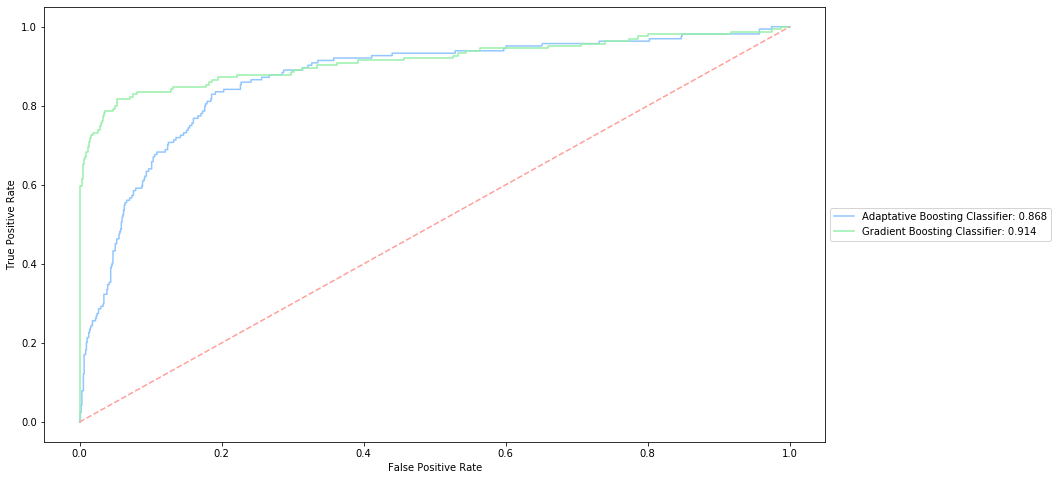

In [33]:
afx.plot_roc(grid_ada.best_estimator_, X_test, y_test, "Adaptative Boosting Classifier")
afx.plot_roc(grid_grad.best_estimator_, X_test, y_test, "Gradient Boosting Classifier")
plt.plot([0, 1], ls="--")
plt.legend(loc='center left', bbox_to_anchor=(1, .5))

__El mejor modelo: Gradient Boosting Classifier__
> Mediante weighted avg de f1-score observamos que Gradient Boosting tiene un desempeño 9 puntos porcentuales por sobre Adaptative Boosting, lo cual es bastante bueno.
> Revisando el área bajo la curva ROC podemos apreciar una mejora considerable al utilizar el estimado Gradient Boosting por sobre Adaptative Boosting.
>
> Respecto al balance en las predicciones correctas, se observa que Gradient Boosting mejora significativamente el balance en la bondad de las predicciones en ambas clases.

## Ejercicio 3: Principales factores asociados

* Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.
* tip: Pueden implementar la función `plot_importance` que se encuentra en la lectura de Bagging y Random Forest.

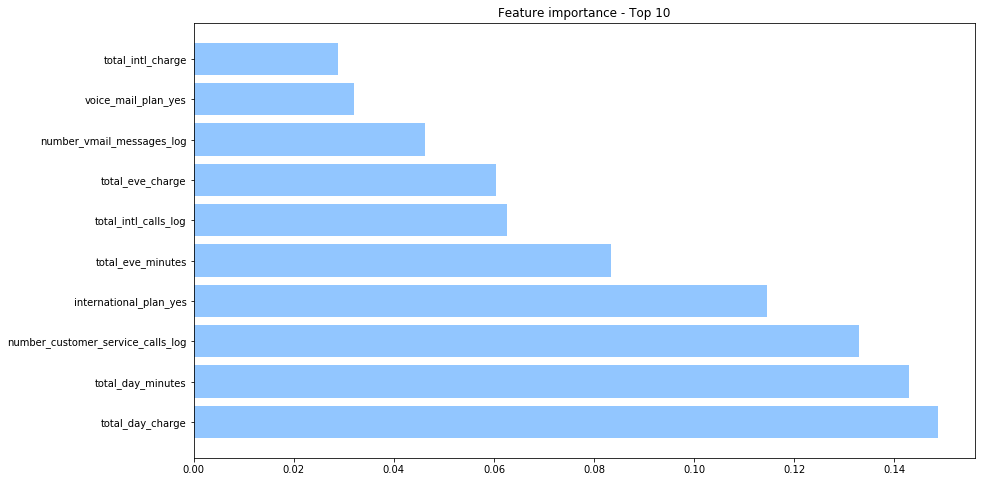

In [34]:
afx.plot_importance(grid_grad.best_estimator_, X.columns, top=10)

> Dada las caracteristicas de los atributos de la base de datos podemos suponer que esta data fue capturada alrededor del año 2005, ya que resume los efectos del cobro diferenciado en las llamadas telefónicas. Es por esta razon que el efecto del gasto en llamadas durante la mañana tiene un efecto bastante significativo en la deserción de un cliente y es probable que la competencia haya sido más competente en ese punto.
>
> Claramenre el numero de llamadas a servicio al cliente es un indicador de algún problema en el servicio y por esta razon aparece como un atributo relevante.
>
> El tener el plan internacional activado puede determinar mayores cobros en la factura mensual y como es un servicio de postpago, la no motivación de pagar algo que ya se usó puede estar deteriorando la tendencia de permanecer en la compañia.
>
> Así como las llamadas durante el día, las llamadas durante la tarde debieron tener un valor más elevado respecto a la competencia.
>
> El plan de mensajes de voz activado pudo tener un costo adicional, lo que puede afectar el cobro mensual y así la tendencia a permanecer en la compañia.

## Ejercicio 4: Probabilidad de fuga

* El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad de fuga. 
* Implemente el modelo predictivo con el archivo `churn_test.csv`.
* Recuerde que para obtener la probabilidad de clase, debe utilizar la función `predict_proba` del modelo.

In [35]:
# Cargamos nuestros datos de validación
df_test = pd.read_csv('churn_test.csv').drop(columns='Unnamed: 0')

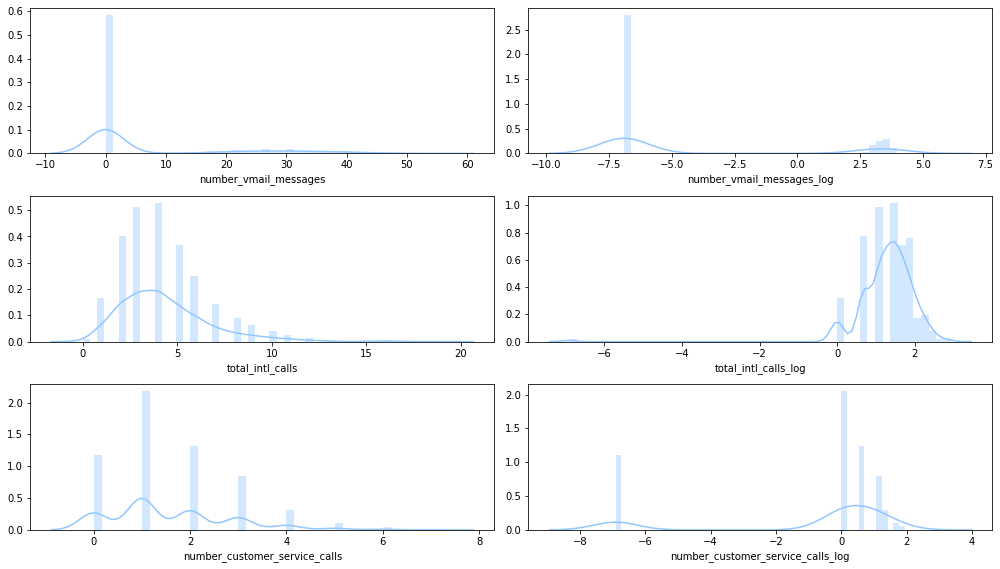

In [36]:
# Aplicamos las transformaciones definidas para el set de datos del ejercicio.
# Aplicamos logaritmo a las variables que presentan sesgo en ciertos valores y graficamos el antes 
# y el después de aplicar la transformación
df_test_log = df_test.copy()
for i, var in enumerate(var_cont_log):
    plt.subplot(3,2, i + i + 1)
    sns.distplot(df_test_log[var])
    df_test_log[var + '_log'] = np.log(df_test_log[var] + 0.001)
    plt.subplot(3,2, i + i + 2)
    sns.distplot(df_test_log[var + '_log'])
    plt.tight_layout()
# Eliminamos las columnas originales
df_test_log.drop(columns=var_cont_log, inplace= True)

In [37]:
# Usamos procesamiento vectorial para transformar el DataFrame
df_test_proc = pd.get_dummies(df_test_log, 
               [x for x in df_test_log.columns if df_test_log[x].dtype =='object'], 
               dummy_na=False,
               drop_first=True
              )

In [38]:
# Separamos nuestra matriz de atributos
X_2 = df_test_proc.drop(columns='churn_yes')
# Separamos nuestro vector objetivo
y_2 = df_test_proc['churn_yes']

In [39]:
# Generamos la predicción con nuestros datos de validación
yhat_2 = grid_grad.best_estimator_.predict(X_2)

In [40]:
# Reportamos métricas
print("Gradient Boosting Classifier: ")
print(f"Cantidad de Estimadores: {grid_grad.best_estimator_.n_estimators}")
print(f"Tasa de Aprendizaje: {grid_grad.best_estimator_.learning_rate}\n")
print(classification_report(y_2, yhat_2))

Gradient Boosting Classifier: 
Cantidad de Estimadores: 2000
Tasa de Aprendizaje: 0.01

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1443
           1       0.94      0.67      0.79       224

    accuracy                           0.95      1667
   macro avg       0.95      0.83      0.88      1667
weighted avg       0.95      0.95      0.95      1667



> Se observa que con los datos de validación las metricas son un poco mejor que con los datos separados en la muestra anterior. Esto signifoca que el modelo tiene una buena capacidad de generalizar la predicción.

___
* __Probabilidad de fuga, por estado:__
> Ahora vamos a evaluar la probabilidad de que un cliente se cambie de compañia por cada estado.

In [41]:
# Generamos la predicción de la probabilidad, con nuestros datos de validación
yhat_2_proba = grid_grad.best_estimator_.predict_proba(X_2)

In [42]:
# Incorporamos la probabilidad a nuestro DataFrame original
df_test['yhat_proba'] = yhat_2_proba[:,1]

In [43]:
# Obtenemos la serie de datos, con cada estado y la media de la probabilidad de fuga
proba_state = df_test.groupby('state')['yhat_proba'].mean().sort_values(ascending=False)

In [44]:
# Reportamos la probabilidad de todos los estados
pd.DataFrame(proba_state).transpose()

state,NJ,CA,OK,MT,KS,TX,AZ,OR,TN,NM,WA,IA,ND,DE,MD,NY,SD,MA,WV,OH,MO,CT,ME,AR,UT,AL,AK,MS,FL,IN,KY,DC,SC,ID,VT,MN,NH,CO,NC,MI,WY,WI,GA,HI,LA,NV,PA,VA,NE,RI,IL
yhat_proba,0.286902,0.228057,0.227864,0.208638,0.194071,0.176203,0.172205,0.171987,0.170283,0.163751,0.161547,0.155155,0.154909,0.150199,0.148154,0.144493,0.140248,0.139537,0.13947,0.137371,0.134713,0.134674,0.128884,0.128499,0.12099,0.116082,0.114525,0.112059,0.111634,0.10999,0.101319,0.100166,0.100132,0.095143,0.091898,0.09069,0.086874,0.083168,0.073518,0.071113,0.069141,0.062642,0.059405,0.057775,0.056788,0.056226,0.054751,0.047044,0.038569,0.036969,0.026224


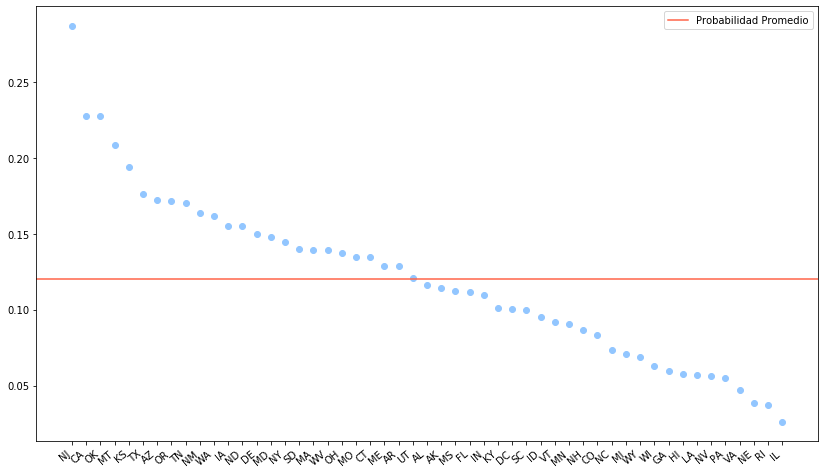

In [45]:
# Graficamos la probabilidad y la media de la probabilidad de toda la muestra
plt.plot(proba_state, 'o')
plt.xticks(rotation=40, ha="right");
plt.axhline(np.mean(proba_state), color='tomato', label='Probabilidad Promedio')
plt.legend();

In [46]:
# Seleccionamos las 3 probabilidad más altas
np.round(proba_state.sort_values(ascending=False)[:3],2)

state
NJ    0.29
CA    0.23
OK    0.23
Name: yhat_proba, dtype: float64

> * __Nueva Jersey__ con un 29% de probabilidad de que los clientes se cambien de compañía.
> * __California__ con un 23% de probabilidad de que los clientes se cambien de compañía.
> * __Oklahoma__ con un 23% de probabilidad de que los clientes se cambien de compañía.

### Adicional:
> Vamos a evaluar GradientBoostingClassifier sin considerar los atributos correlacionados, mencionados en el ejercicio 1.

In [47]:
df_no_corr = df.drop(columns=max_corr.columns)

In [48]:
df_no_corr.shape

(3333, 16)

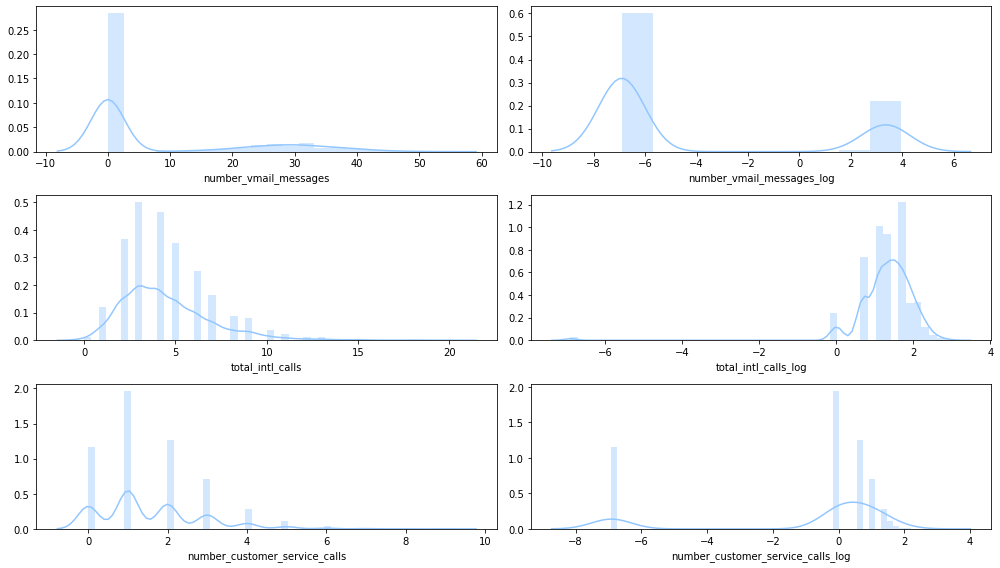

In [49]:
# Aplicamos logaritmo a las variables que presentan sesgo en ciertos valores y graficamos el antes 
# y el después de aplicar la transformación

df_log_no_corr = df_no_corr.copy()

for i, var in enumerate(var_cont_log):
    plt.subplot(3,2, i + i + 1)
    sns.distplot(df_log_no_corr[var])
    df_log_no_corr[var + '_log'] = np.log(df_log_no_corr[var] + 0.001)
    plt.subplot(3,2, i + i + 2)
    sns.distplot(df_log_no_corr[var + '_log'])
    plt.tight_layout()

In [50]:
# Eliminamos las columnas originales
df_log_no_corr.drop(columns=var_cont_log, inplace=True)

In [51]:
# Usamos procesamiento vectorial para transformar el DF
df_proc_no_corr = pd.get_dummies(df_log_no_corr, 
               [x for x in df_log_no_corr.columns if df_log_no_corr[x].dtype =='object'], 
               dummy_na=False,
               drop_first=True
              )

In [52]:
df_proc_no_corr.shape

(3333, 66)

In [53]:
# Separamos nuestra matriz de atributos
X_3 = df_proc_no_corr.drop(columns='churn_yes')
# Separamos nuestro vector objetivo
y_3 = df_proc_no_corr['churn_yes']
# Separamos las muestras de entrenamiento y validación
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = .33, random_state = 14173)

In [54]:
# Implementamos la búsqueda de grilla para el estimados GradientBoostingClassifier
grid_grad_no_corr = GridSearchCV(estimator = GradientBoostingClassifier(), 
                         param_grid = param_grad, 
                         cv = 5, 
                         n_jobs = -1).fit(X_train_3, y_train_3)

/Users/procco/.virtualenv/datascience/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [55]:
# Guardamos las predicciones del del modelo con el mejor estimador
yhat_grad_no_corr = grid_grad_no_corr.best_estimator_.predict(X_test_3)

In [56]:
# Reportamos métricas
print("Gradient Boosting Classifier (no corr): ")
print(f"Cantidad de Estimadores: {grid_grad_no_corr.best_estimator_.n_estimators}")
print(f"Tasa de Aprendizaje: {grid_grad_no_corr.best_estimator_.learning_rate}\n")
print(classification_report(y_test_3, yhat_grad_no_corr))

Gradient Boosting Classifier (no corr): 
Cantidad de Estimadores: 1000
Tasa de Aprendizaje: 0.1

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       936
           1       0.88      0.70      0.78       164

    accuracy                           0.94      1100
   macro avg       0.92      0.84      0.87      1100
weighted avg       0.94      0.94      0.94      1100



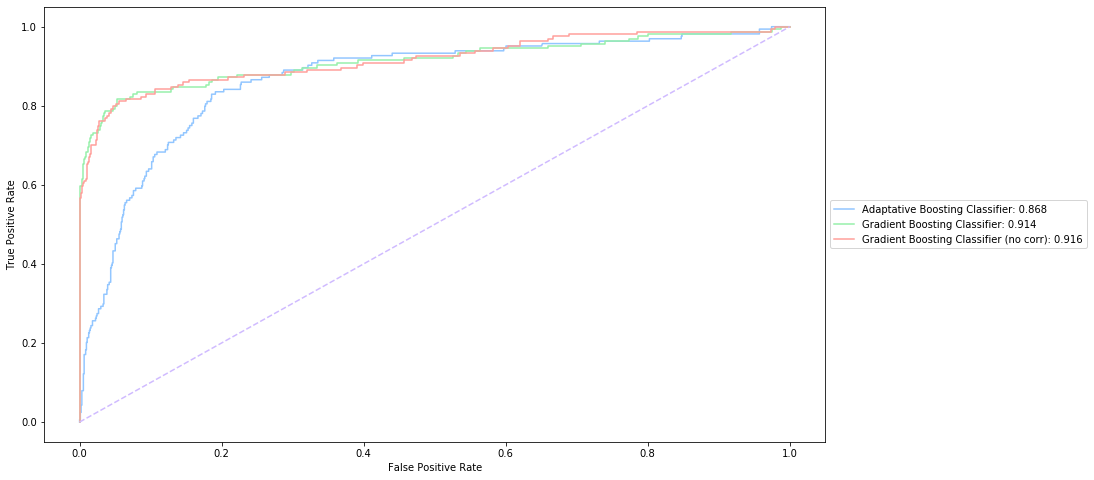

In [57]:
afx.plot_roc(grid_ada.best_estimator_, X_test, y_test, "Adaptative Boosting Classifier")
afx.plot_roc(grid_grad.best_estimator_, X_test, y_test, "Gradient Boosting Classifier")
afx.plot_roc(grid_grad_no_corr.best_estimator_, X_test_3, y_test_3, "Gradient Boosting Classifier (no corr)")
plt.plot([0, 1], ls="--")
plt.legend(loc='center left', bbox_to_anchor=(1, .5));

> __Conclusiones:__ En relación a AOC, al eliminar atributos correlacionados se presenta un modelo un poco mejor (+0,002) que el que tiene todos los atributos, no obstante weighted avg de f1-score es un poco peor (-0,01).
>
> Dado que no se presenta suficiente evidencia como para determinar que el modelo funciona sustancialmente mejor eliminando los atributos correlacionados y el problema no requiere de tanta capacidad de computo, nos quedamos con el modelo que incluye todos los atributos.